# Oil Production Regression Machine Learning

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Read the csv file into a pandas DataFrame

oil_prod = pd.read_csv('../data/clean_data/Oil Production - Barrels-YearFixed-Python.csv')
oil_prod = oil_prod.rename(columns={"Total World": "World Barrels"})

In [5]:
pop = pd.read_csv('../data/clean_data/WorldPopulationbyYear.csv')
pop = pop.rename(columns={"World": "World Population"})

In [7]:
oil_pop = pop.merge(oil_prod, on="Year")
# oil_pop

In [8]:
gdp = pd.read_csv('../data/clean_data/GDP%-YearFixed-Python.csv', encoding = "ISO-8859-1")
filteredGDP = gdp[["Year", "United States", "World"]]
filteredGDP = filteredGDP.rename(columns={"United States": "US GDP%", "World": "World GDP%"})
# filteredGDP.head()

In [9]:
inflation = pd.read_csv('../data/clean_data/InflationAnnual%-YearFixed-Python.csv', encoding = "ISO-8859-1")
filteredInflation = inflation[["Year", "United States", "World"]]
filteredInflation = filteredInflation.rename(columns={"United States": "US Inflation%", "World": "World Inflation%"})
# filteredInflation.head()

In [10]:
goodsTax = pd.read_csv('../data/clean_data/Taxes%-YearFixed-Python.csv', encoding = "ISO-8859-1")
filteredGoodsTax = goodsTax[["Year", "United States", "World"]]
filteredGoodsTax = filteredGoodsTax.rename(columns={"United States": "US Goods Tax%", "World": "World Goods Tax%"})
# filteredGoodsTax.head()

In [11]:
# Merge dataframes on Year
gdp_oil_pop = oil_pop.merge(filteredGDP, on="Year")
gdp_oil_pop_infl = gdp_oil_pop.merge(filteredInflation, on="Year")
full_merge = gdp_oil_pop_infl.merge(filteredGoodsTax, on="Year")

In [12]:
# Clean NaNs
full_merge = full_merge.replace(np.nan, 0)
full_merge

,Year,World Population,Algeria,Angola,Argentina,Australia,Azerbaijan,Brazil,Brunei,Canada,...,Uzbekistan,Venezuela,Vietnam,Yemen,US GDP%,World GDP%,US Inflation%,World Inflation%,US Goods Tax%,World Goods Tax%
0,1965,3322973367,569.94,13.30,275.67,7.00,0.00,96.05,80.00,920.00,...,0.00,3503.00,0.00,0.00,0.000000,0.000000,1.585169,0.000000,0.000000,0.000000
1,1966,3393031801,733.59,12.81,292.86,9.00,0.00,117.05,96.00,1012.00,...,0.00,3402.00,0.00,0.00,0.000000,0.000000,3.015075,0.000000,0.000000,0.000000
2,1967,3462460201,842.66,10.90,318.63,21.00,0.00,147.05,104.00,1106.00,...,0.00,3576.00,0.00,0.00,0.000000,0.000000,2.772786,0.000000,0.000000,0.000000
3,1968,3532826854,922.50,15.18,348.16,39.00,0.00,161.05,122.00,1194.00,...,0.00,3639.00,0.00,0.00,0.000000,0.000000,4.271796,0.000000,0.000000,0.000000
4,1969,3607499991,969.33,49.90,361.53,45.00,0.00,176.05,124.00,1306.00,...,0.00,3631.00,0.00,0.00,0.000000,0.000000,5.462386,0.000000,0.000000,0.000000
5,1970,3682911039,1053.93,102.83,399.46,176.00,0.00,166.68,136.00,1473.00,...,0.00,3754.00,0.00,0.00,21.414736,26.911121,5.838255,0.000000,0.000000,0.000000
6,1971,3760509002,802.59,116.14,431.54,315.00,0.00,174.85,129.00,1582.00,...,0.00,3615.00,0.00,0.00,21.919818,26.526697,4.292767,0.000000,0.000000,0.000000
7,1972,3836892580,1081.05,142.88,444.12,337.00,0.00,171.19,182.00,1829.00,...,0.00,3301.00,0.00,0.00,22.580622,26.164536,3.272278,0.000000,7.143859,0.000000
8,1973,3912347640,1128.74,165.96,433.64,424.00,0.00,173.99,231.00,2114.00,...,0.00,3455.00,0.00,0.00,23.331809,27.054172,6.177760,0.000000,6.579487,0.000000
9,1974,3988478324,1045.98,173.39,423.39,420.00,0.00,181.76,198.00,1993.00,...,0.00,3060.00,0.00,0.00,22.694942,27.896165,11.054805,0.000000,5.990202,0.000000


In [15]:
# Assign the data to X and y and reshape for 2-dimensional array of values

X = full_merge["World Population"][15:36].values.reshape(-1, 1)
# y = full_merge["World Barrels"][15:36].values.reshape(-1, 1)
y = full_merge["World Barrels"][16:37].values.reshape(-1, 1)

# print("Shape: ", X.shape, y.shape)

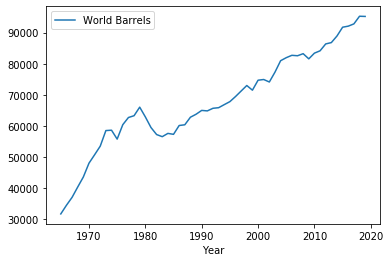

In [16]:
# Plot the data to see if a linear trend exists

# plt.scatter(X, y)
full_merge.plot(kind = "line", x="Year", y="World Barrels")

# plt.ylabel("Barrels")
### END SOLUTION

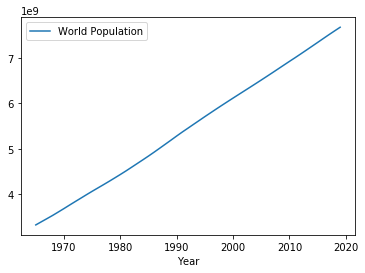

In [17]:
full_merge.plot(kind = "line", x="Year", y="World Population")

In [ ]:
# x = final_gas_prod['Year']
# y1 = final_gas_prod['Total Exajoules']
# y2 = final_gas_prod['Total Population']

# plt.figure(figsize=(20,5))

# plt.subplot(131)
# plt.plot(x, y1, color='b')
# plt.subplot(132)
# plt.plot(x, y2, color='g')
# plt.show()

## SKLearn Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Checking Data

In [19]:
world_pop_2000 = full_merge.loc[full_merge['Year']==2000, 'World Population'].values.reshape(-1, 1)
# world_pop_2000.shape

In [20]:
# Need to use 2000 World Population for prediction of 2001
world_pop_2000 = full_merge['World Population'][35].reshape(-1, 1)

# Need to use 2001 World Barrels actual for comparison
barrels_2000 = full_merge['World Barrels'][36].reshape(-1, 1)

In [21]:
barrels_2000 = full_merge.loc[full_merge['Year']==2000, 'World Barrels'].values.reshape(-1, 1)
# barrels_2000.shape

## Model.fit

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
fitment = model.fit(X, y)
# r2 = r2_score(barrels_2000, predicted)

## Test prediction on 2001

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = fitment.predict(world_pop_2000)

print(f"Prediction: {predicted}")
print(f"Actual: {barrels_2000}")

Prediction: [[74239.0291796]]
Actual: [[74717.78]]


## One-step Forecast

In [24]:
# Using 2000 - 2009 data to run historical prediction 2001 - 2010

predict0110=[]

for year in range(10):
    start = 1980 + year
    end = 2000 + year

    xy = full_merge.loc[full_merge['Year'].between(start, end), ['World Population', 'World Barrels', 'World Inflation%', 'World Goods Tax%', 'World GDP%']]
    
    # Does not need .value.reshape(-1, 1) as there's dimension now with 2+ features
    X = xy[["World Population", "World Inflation%", "World Goods Tax%", "World GDP%"]]
    y = xy["World Barrels"].values.reshape(-1, 1)
#     print (X.iloc[20])
    fitment = model.fit(X, y)
    
    # changed reshape to (1, -1)
    oil_predict = fitment.predict(X.iloc[20].values.reshape(1, -1))
    predict0110.append(oil_predict.flatten()[0])
    
print(predict0110)

[72952.57356607151, 75046.5431221062, 75168.60208846927, 76811.21789042928, 79861.31031539556, 81611.11657201752, 83187.07629682889, 84178.74162142853, 83642.76754333521, 82408.18037433061]


## Historical Prediction MSE and R2

In [ ]:
# Use our model to make predictions
predicted = model.predict(X_test)

mse = mean_squared_error(barrels_2000, predicted)
r2 = r2_score(barrels_2000, predicted)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

## Historical Predictions

In [25]:
hist_pred_0110_df = full_merge.loc[full_merge['Year'].between(2001, 2010), ['Year', 'World Barrels']]
hist_pred_0110_df["Prediction"] = predict0110
hist_pred_0110_df["Difference"] = hist_pred_0110_df["Prediction"] - hist_pred_0110_df["World Barrels"]
hist_pred_0110_df["% Difference"] = ((hist_pred_0110_df["Prediction"] - hist_pred_0110_df["World Barrels"])/hist_pred_0110_df["World Barrels"])*100
hist_pred_0110_df

,Year,World Barrels,Prediction,Difference,% Difference
36,2001,74942.96,72952.573566,-1990.386434,-2.655868
37,2002,74144.97,75046.543122,901.573122,1.215960
38,2003,77305.05,75168.602088,-2136.447912,-2.763659
39,2004,80979.16,76811.217890,-4167.942110,-5.146932
40,2005,81951.57,79861.310315,-2090.259685,-2.550604
41,2006,82711.27,81611.116572,-1100.153428,-1.330113
42,2007,82569.68,83187.076297,617.396297,0.747728
43,2008,83234.06,84178.741621,944.681621,1.134970
44,2009,81577.58,83642.767543,2065.187543,2.531563
45,2010,83409.28,82408.180374,-1001.099626,-1.200226


## Save Historical Predictions to CSV

In [26]:
hist_pred_0110_df.to_csv('../data/clean_data/Oil_prod_hist_predict_01_10.csv', index=False)

## Features' Rolling Average for 2020 - 2024

In [28]:
df = full_merge.loc[full_merge['Year'].between(2010, 2019), ['Year',
                                                             'World Population',
                                                             'World Barrels', 
                                                             'World Inflation%', 
                                                             'World Goods Tax%', 
                                                             'World GDP%']]

addtlRow = ['55', '56', '57', '58', '59']
for r in addtlRow:
    df.loc[r] = np.NaN
    
df["pop avg"] = df.iloc[5:,1].rolling(window=5).mean().shift()
df["barrl"] = df.iloc[5:,2].rolling(window=5).mean().shift()
df["infl"] = df.iloc[5:,3].rolling(window=5).mean().shift()
df["gtax"] = df.iloc[5:,4].rolling(window=5).mean().shift()
df["wgdp"] = df.iloc[5:,5].rolling(window=5).mean().shift()
# df.shift(-5, axis = 0)
df['Year'].iloc[10] = 2020
df['World Population'].iloc[10] = df['pop avg'].iloc[10]
df['World Barrels'].iloc[10] = df['barrl'].iloc[10]
df['World Inflation%'].iloc[10] = df['infl'].iloc[10]
df['World Goods Tax%'].iloc[10] = df['gtax'].iloc[10]
df['World GDP%'].iloc[10] = df['wgdp'].iloc[10]
df

,Year,World Population,World Barrels,World Inflation%,World Goods Tax%,World GDP%,pop avg,barrl,infl,gtax,wgdp
45,2010.0,6.921872e+09,83409.280,3.326345,31.875890,24.207113,NaN,NaN,NaN,NaN,NaN
46,2011.0,7.002861e+09,84156.760,4.839403,33.264196,24.547417,NaN,NaN,NaN,NaN,NaN
47,2012.0,7.085763e+09,86366.040,3.707818,33.271756,24.404915,NaN,NaN,NaN,NaN,NaN
48,2013.0,7.169640e+09,86794.170,2.605818,32.787076,24.310278,NaN,NaN,NaN,NaN,NaN
49,2014.0,7.254228e+09,88909.980,2.346269,33.191709,24.470283,NaN,NaN,NaN,NaN,NaN
50,2015.0,7.338965e+09,91732.640,1.393330,33.724915,24.297531,NaN,NaN,NaN,NaN,NaN
51,2016.0,7.424282e+09,92072.430,1.486007,34.248831,23.913640,NaN,NaN,NaN,NaN,NaN
52,2017.0,7.509066e+09,92797.830,2.233522,33.333664,24.222791,NaN,NaN,NaN,NaN,NaN
53,2018.0,7.591933e+09,95254.090,2.458142,34.011405,24.382773,NaN,NaN,NaN,NaN,NaN
54,2019.0,7.673534e+09,95192.450,2.318441,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN


In [30]:
df2 = df[["Year", "World Population", "World Barrels", "World Inflation%", "World Goods Tax%", "World GDP%"]]
df2["pop avg"] = df2.iloc[5:,1].rolling(window=5).mean().shift()
df2["barrl"] = df2.iloc[5:,2].rolling(window=5).mean().shift()
df2["infl"] = df2.iloc[5:,3].rolling(window=5).mean().shift()
df2["gtax"] = df2.iloc[5:,4].rolling(window=5).mean().shift()
df2["wgdp"] = df2.iloc[5:,5].rolling(window=5).mean().shift()
# df.shift(-5, axis = 0)
df2['Year'].iloc[11] = 2021
df2['World Population'].iloc[11] = df2['pop avg'].iloc[11]
df2['World Barrels'].iloc[11] = df2['barrl'].iloc[11]
df2['World Inflation%'].iloc[11] = df2['infl'].iloc[11]
df2['World Goods Tax%'].iloc[11] = df2['gtax'].iloc[11]
df2['World GDP%'].iloc[11] = df2['wgdp'].iloc[11]

C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [31]:
df3 = df2[["Year", "World Population", "World Barrels", "World Inflation%", "World Goods Tax%", "World GDP%"]]
df3["pop avg"] = df3.iloc[5:,1].rolling(window=5).mean().shift()
df3["barrl"] = df3.iloc[5:,2].rolling(window=5).mean().shift()
df3["infl"] = df3.iloc[5:,3].rolling(window=5).mean().shift()
df3["gtax"] = df3.iloc[5:,4].rolling(window=5).mean().shift()
df3["wgdp"] = df3.iloc[5:,5].rolling(window=5).mean().shift()
# df.shift(-5, axis = 0)
df3['Year'].iloc[12] = 2022
df3['World Population'].iloc[12] = df3['pop avg'].iloc[12]
df3['World Barrels'].iloc[12] = df3['barrl'].iloc[12]
df3['World Inflation%'].iloc[12] = df3['infl'].iloc[12]
df3['World Goods Tax%'].iloc[12] = df3['gtax'].iloc[12]
df3['World GDP%'].iloc[12] = df3['wgdp'].iloc[12]

C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [32]:
df4 = df3[["Year", "World Population", "World Barrels", "World Inflation%", "World Goods Tax%", "World GDP%"]]
df4["pop avg"] = df4.iloc[5:,1].rolling(window=5).mean().shift()
df4["barrl"] = df4.iloc[5:,2].rolling(window=5).mean().shift()
df4["infl"] = df4.iloc[5:,3].rolling(window=5).mean().shift()
df4["gtax"] = df4.iloc[5:,4].rolling(window=5).mean().shift()
df4["wgdp"] = df4.iloc[5:,5].rolling(window=5).mean().shift()
# df.shift(-5, axis = 0)
df4['Year'].iloc[13] = 2023
df4['World Population'].iloc[13] = df4['pop avg'].iloc[13]
df4['World Barrels'].iloc[13] = df4['barrl'].iloc[13]
df4['World Inflation%'].iloc[13] = df4['infl'].iloc[13]
df4['World Goods Tax%'].iloc[13] = df4['gtax'].iloc[13]
df4['World GDP%'].iloc[13] = df4['wgdp'].iloc[13]

C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [33]:
df5 = df4[["Year", "World Population", "World Barrels", "World Inflation%", "World Goods Tax%", "World GDP%"]]
df5["pop avg"] = df5.iloc[5:,1].rolling(window=5).mean().shift()
df5["barrl"] = df5.iloc[5:,2].rolling(window=5).mean().shift()
df5["infl"] = df5.iloc[5:,3].rolling(window=5).mean().shift()
df5["gtax"] = df5.iloc[5:,4].rolling(window=5).mean().shift()
df5["wgdp"] = df5.iloc[5:,5].rolling(window=5).mean().shift()
# df.shift(-5, axis = 0)
df5['Year'].iloc[14] = 2024
df5['World Population'].iloc[14] = df5['pop avg'].iloc[14]
df5['World Barrels'].iloc[14] = df5['barrl'].iloc[14]
df5['World Inflation%'].iloc[14] = df5['infl'].iloc[14]
df5['World Goods Tax%'].iloc[14] = df5['gtax'].iloc[14]
df5['World GDP%'].iloc[14] = df5['wgdp'].iloc[14]
df_final = df5[["Year", "World Population", "World Barrels", "World Inflation%", "World Goods Tax%", "World GDP%"]]
df_final

C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,Year,World Population,World Barrels,World Inflation%,World Goods Tax%,World GDP%
45,2010.0,6.921872e+09,83409.280000,3.326345,31.875890,24.207113
46,2011.0,7.002861e+09,84156.760000,4.839403,33.264196,24.547417
47,2012.0,7.085763e+09,86366.040000,3.707818,33.271756,24.404915
48,2013.0,7.169640e+09,86794.170000,2.605818,32.787076,24.310278
49,2014.0,7.254228e+09,88909.980000,2.346269,33.191709,24.470283
50,2015.0,7.338965e+09,91732.640000,1.393330,33.724915,24.297531
51,2016.0,7.424282e+09,92072.430000,1.486007,34.248831,23.913640
52,2017.0,7.509066e+09,92797.830000,2.233522,33.333664,24.222791
53,2018.0,7.591933e+09,95254.090000,2.458142,34.011405,24.382773
54,2019.0,7.673534e+09,95192.450000,2.318441,0.000000,0.000000


In [34]:
df_final.Year = pd.Series(df_final.Year, dtype=object)
df_final.reset_index(inplace=True)
df_final

C:\Users\Kristi\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,index,Year,World Population,World Barrels,World Inflation%,World Goods Tax%,World GDP%
0,45,2010,6.921872e+09,83409.280000,3.326345,31.875890,24.207113
1,46,2011,7.002861e+09,84156.760000,4.839403,33.264196,24.547417
2,47,2012,7.085763e+09,86366.040000,3.707818,33.271756,24.404915
3,48,2013,7.169640e+09,86794.170000,2.605818,32.787076,24.310278
4,49,2014,7.254228e+09,88909.980000,2.346269,33.191709,24.470283
5,50,2015,7.338965e+09,91732.640000,1.393330,33.724915,24.297531
6,51,2016,7.424282e+09,92072.430000,1.486007,34.248831,23.913640
7,52,2017,7.509066e+09,92797.830000,2.233522,33.333664,24.222791
8,53,2018,7.591933e+09,95254.090000,2.458142,34.011405,24.382773
9,54,2019,7.673534e+09,95192.450000,2.318441,0.000000,0.000000


## Multi-step Forecast

In [35]:
future_predict=[]

for year in range(15):
    # Think about start and end
    start = 2010 + year
    end = 2019 + year
    
    # Rolling df for features
    multi_feat2 = df_final.loc[df_final['Year'].between(start, end), ['World Population', 'World Barrels', 'World Inflation%', 'World Goods Tax%', 'World GDP%']]
#     print(multi_feat)
    X = multi_feat2[["World Population", "World Inflation%", "World Goods Tax%", "World GDP%"]]
    y = multi_feat2["World Barrels"].values.reshape(-1, 1)
    fitment = model.fit(X, y)
#     print(y.shape)
    multi_predict2 = fitment.predict(X.iloc[0].values.reshape(1, -1))
    future_predict.append(multi_predict2.flatten()[0])
print(future_predict)

[83149.82785345745, 84233.7310208278, 86035.50491453525, 86874.31461829075, 88893.4980816482, 91732.64000000013, 92072.42999999924, 92797.82999999961, 95254.08999999985, 95192.44999999972, 93409.8879999998, 93745.33760000003, 94079.91912000002, 94336.33694399998, 94152.78633280001]


## Future Prediction Compared to Actual

In [36]:
prediction_20_24 = df_final.loc[df_final['Year'].between(2010, 2024), ['Year', 'World Barrels']]
prediction_20_24["Prediction"] = future_predict
prediction_20_24["Difference"] = prediction_20_24["Prediction"] - prediction_20_24["World Barrels"]
prediction_20_24["% Difference"] = ((prediction_20_24["Prediction"] - prediction_20_24["World Barrels"])/prediction_20_24["World Barrels"])*100
prediction_20_24

,Year,World Barrels,Prediction,Difference,% Difference
0,2010,83409.280000,83149.827853,-2.594521e+02,-3.110591e-01
1,2011,84156.760000,84233.731021,7.697102e+01,9.146148e-02
2,2012,86366.040000,86035.504915,-3.305351e+02,-3.827142e-01
3,2013,86794.170000,86874.314618,8.014462e+01,9.233871e-02
4,2014,88909.980000,88893.498082,-1.648192e+01,-1.853776e-02
5,2015,91732.640000,91732.640000,1.309672e-10,1.427706e-13
6,2016,92072.430000,92072.430000,-7.566996e-10,-8.218525e-13
7,2017,92797.830000,92797.830000,-3.929017e-10,-4.233954e-13
8,2018,95254.090000,95254.090000,-1.455192e-10,-1.527695e-13
9,2019,95192.450000,95192.450000,-2.764864e-10,-2.904499e-13


## Push Future Predictions to CSV

In [37]:
prediction_20_24.to_csv('../data/clean_data/Oil_prod_future_predict_20_24.csv', index=False)

In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = brains["Year"].values.reshape(-1, 1)
y = brains["Total World"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (55, 1) (55, 1)


Text(0, 0.5, 'Barrels')

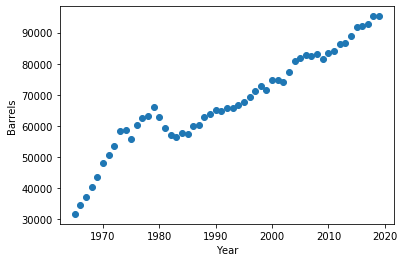

In [4]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Year")
plt.ylabel("Barrels")
### END SOLUTION

In [5]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

### END SOLUTION

In [6]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [7]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 12975068.85172297
R-squared (R2): 0.9358085418228268


In [9]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.9358085418228267